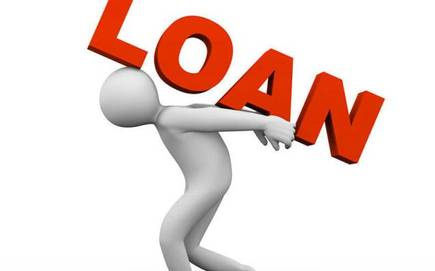

## Introduction
This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.



## 1. Import Libraries

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)



## 2.Reading and Inspection


In [ ]:
# Read data from file 'application_data.csv' 
df= pd.read_csv("../input/loan-defaulter/application_data.csv")

# Preview the first 5 lines of the loaded data
df.head()


In [ ]:
#Determining the number of rows and columns
df.shape

In [ ]:
#summary of all the numeric columns in the dataset
df.describe()

In [ ]:
#Datatypes of each column
df.info(verbose=True)

## 3.Check missing values

In [ ]:
#Column-wise null count 
df.isnull().sum()


In [ ]:
#Percentage of missing values for all columns 
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count


In [ ]:
#Columns with high missing percentage >=50%
null_count=null_count[null_count>=50]
null_count


In [ ]:
len(null_count)

Thus, here we can see that there are 41 columns having the highest missing percentage( >=50%)  So here we remove those columns

## 4.Impute/Remove missing values

In [ ]:
#Removing those 41 columns which have missing values more than 50%
cols_dropped=([null_count[null_count >=50.00].index])
df.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [ ]:
#Rows and Columns after removing columns with high missing percentage
df.shape

In [ ]:
# Checking the columns after removing high missing values(>=50%)
100*(df.isnull().sum()/len(df.index))

Notice that there are columns having almost 48%, 13%, 19% etc. missing values. When dealing with columns, you have two simple choices - either delete or retain the column. If you retain the column, you'll have to treat (i.e. delete or impute) the rows having missing values.

If you delete the missing rows, you lose data. If you impute, you introduce bias.

Apart from the number of missing values, the decision to delete or retain a variable depends on various other factors, such as:

The analysis task at hand,
The usefulness of the variable (based on your understanding of the problem),
The total size of available data (if you have enough, you can afford to throw away some of it)
etc.
Thus, for this exercise, let's remove the columns having more than missing values and which are not necessary for our analysis.

In [ ]:
# Drop unnecessary columns from the dataset

Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

df.drop(labels=Drop_col,axis=1,inplace=True)

In [ ]:
# Checking the columns after dropping unncessary columns

100*(df.isnull().sum()/len(df.index))

#### AMT_ANNUITY Variable

In [ ]:
#Missing values in "AMT_ANNUITY" column
df.AMT_ANNUITY.isnull().sum()

In [ ]:
#Percentage of missing values in "AMT_ANNUITY" column
float(100*(12/307511))

We can see that 'AMT_ANNUITY' column is having very less percentage of null values and is also a numeric data.  These values can be imputed by the mean of the complete cases of the variable.
Since this column is also having an outlier which is very large we can impute missing values with Median.

#### AMT_GOODS_PRICE variable

In [ ]:
#Missing values in "AMT_GOODS_PRICE" column
df.AMT_GOODS_PRICE.isnull().sum()

In [ ]:
#Percentage of missing values in "AMT_GOODS_PRICE" column
float(100*(278/307511))

AMT_GOODS_PRICE has less percentage of missing values. And also has outliers. These missing values can be imputed with median 

#### EXT_SOURCE_2 variable

In [ ]:
df.EXT_SOURCE_2.isnull().sum()

In [ ]:
float(100*(660/307511))

EXT_SOURCE_2 column has less percentage of missing values. Here we can impute the missing values with 0

#### NAME_TYPE_SUITE Variable

In [ ]:
#Missing values in "NAME_TYPE_SUITE" column
df.NAME_TYPE_SUITE.isnull().sum()

In [ ]:
#Percentage of missing values in "NAME_TYPE_SUITE" column
100*(1292/307511)

In [ ]:
#print the percentage of each NAME_TYPE_SUITE in the data frame df.
df.NAME_TYPE_SUITE.value_counts(normalize= True)

In [ ]:
#find the mode of NAME_TYPE_SUITE in df, check which category is most repeated
name_mode=df.NAME_TYPE_SUITE.mode()[0]
name_mode

Hence here 'NAME_TYPE_SUITE' being a categorical variable, has about 0.42% of missing values. So here we can impute the missing values with the most popular category which is "Unaccompanied"

#### OCCUPATION_TYPE variable

In [ ]:
#Missing values in "OCCUPATION_TYPE" column
df.OCCUPATION_TYPE.isnull().sum()

In [ ]:
#Percentage of missing values in "OCCUPATION_TYPE" column
100*(96391/307511)

In [ ]:
#print the percentage of each OCCUPATION TYPES in the data frame df 
df.OCCUPATION_TYPE .value_counts(normalize=True)

In [ ]:
#find the mode of NAME_TYPE_SUITE in df, check which category is most repeated
occ_mode=df.OCCUPATION_TYPE.mode()[0]
occ_mode

Here 'OCCUPATION_TYPE' is also a categorical variable, has about 31.3% of missing values. So here we can impute the missing values with the most popular category which is "Laborers"

## 5.Checking Datatypes 

In [ ]:
#Preview the first 5 lines of the data
df.head()

In [ ]:
# I can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

df.nunique().sort_values()

Now it is clear that which are Continuous and Categorical variables in the dataset givenn. Now we can consider some continuous and categorical variables and change the datatypes if needed

In [ ]:
#changing negative ages to positive ages.
df['DAYS_BIRTH']=abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].describe()

In [ ]:
#changing negative values in days to positive days
df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])
df['DAYS_EMPLOYED'].describe()

In [ ]:
#changing negative days to positive days.
df['DAYS_REGISTRATION']=abs(df['DAYS_REGISTRATION'])
df['DAYS_REGISTRATION'].describe()

In [ ]:
#changing negative days to positive 
df['DAYS_ID_PUBLISH']=abs(df['DAYS_ID_PUBLISH'])
df['DAYS_ID_PUBLISH'].describe()

In [ ]:
#converting the data type of categorical column
df['REG_REGION_NOT_LIVE_REGION'] = df['REG_REGION_NOT_LIVE_REGION'].astype(object)
df.dtypes

In [ ]:
#Changing region from int to object
df['REG_REGION_NOT_WORK_REGION'] = df['REG_REGION_NOT_WORK_REGION'].astype(object)

In [ ]:
#Changing region from int to object
df['LIVE_REGION_NOT_WORK_REGION'] = df['LIVE_REGION_NOT_WORK_REGION'].astype(object)

In [ ]:
#Changing city from int to object
df['REG_CITY_NOT_LIVE_CITY'] = df['REG_CITY_NOT_LIVE_CITY'].astype(object)

In [ ]:
#Changing city from int to object
df['REG_CITY_NOT_WORK_CITY'] = df['REG_CITY_NOT_WORK_CITY'].astype(object)

In [ ]:
#Changing city from int to object
df['LIVE_CITY_NOT_WORK_CITY']=df['LIVE_CITY_NOT_WORK_CITY'].astype(object)

In [ ]:
df.head()

## 6.Handling Outliers

Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### AMT_ANNUITY variable

In [ ]:
#describe the AMT_ANNUITY variable of df

df.AMT_ANNUITY.describe()

In [ ]:
sns.boxplot(df.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

As we take a look at AMT_ANNUITY column we can see that there are outliers at 258025.  But there is no much differece between the mean and median, We can impute the outliers with Median here


#### AMT_INCOME variable

In [ ]:
df.AMT_INCOME_TOTAL.describe()

In [ ]:
plt.figure(figsize=(9,2))
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()

In [ ]:
df.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

In 'AMT_INCOME_TOTAL' column, We can see that there are outlier values at 1.17x10^8. Sometimes, it is beneficial to look into the quantiles instead of the box plot, mean or median. Quantile may give you a fair idea about the outliers. If there is a huge difference between the maximum value and the 95th or 99th quantiles, then there are outliers in the data set.

Total income will definitely vary from person to person. We can cap the outliers here

#### AMT_CREDIT variable

In [ ]:
df.AMT_CREDIT.describe()

In [ ]:
plt.figure(figsize=(9,2))
sns.boxplot(df.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

In [ ]:
df.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

In this AMT_CREDIT column we can see the outliers after 99th quantile at 4.05x10^6
Amount credited also varies from person to person.

#### DAYS_BIRTH variable

In [ ]:
df.DAYS_BIRTH.describe()

In [ ]:
sns.boxplot(df.DAYS_BIRTH)
plt.title('Distribution of Age in the form of days')
plt.show()

DAYS_BIRTH column we can see from box plot that there are no outliers. There is no much difference between mean and median. Which means that all the applications received from the customers are of almost same age. 

#### DAYS_EMPLOYED variable

In [ ]:
df.DAYS_EMPLOYED.describe()

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df.DAYS_EMPLOYED)
#plt.yscale('log')
plt.title('Distribution of Days the client employed')

plt.show()

DAYS_EMPLOYED column has outliers at 365243. Number of days the person was employed varies from person to person

## 7. Binning Continuous Variable

#### AMT_INCOME_TOTAL variable

In [ ]:
#Creating bins for Credit amount

bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [ ]:
# Creating bins for income amount

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [ ]:
# Creating bins for days_birth

bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

df['AGE_RANGE']=pd.cut(df['DAYS_BIRTH'],bins,labels=slot)

In [ ]:
#Checking bin columns created in df.
df.head()

## 8.Analysis

### Checking the imbalance Percentage

In [ ]:
# Calculating Imbalance percentage
100*(df.TARGET.value_counts())/ (len(df))

So TARGET column has 8.07% of 1's which means 8% clients have payment difficulties and 91.92% are having no difficulties

In [ ]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target_1 = df[df['TARGET']==1]
target_0 = df[df['TARGET']==0]

In [ ]:
#Dataframe having target values 0
target_0.head()

In [ ]:
#Dataframe having target values 1
target_1.head()

### 8. Univariate Analysis for target =0 and target=1

### Numeric variable

#### Age

In [ ]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(target_0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AGE_RANGE'])
plt.show()

###### We can observe that customers belonging to age group 30-40 are able to make payment on time and can be considered while lending loan!
##### The customers from 40 to 60 age are also can be considered.

#### Amount credit range

In [ ]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(target_0['AMT_CREDIT_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AMT_CREDIT_RANGE'], palette='muted')
plt.show()

###### Customers with less credit and most likely to make payment. Customers having medium and high credit can also be considered while lending the loan


### Categorical Variable

#### Occupation_type

In [ ]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(target_0['OCCUPATION_TYPE'])
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()



##### The plot clearly shows that labourers are most likely to make payment on time whereas HR staff are less likely to make payment on time

#### Name _Income _Type

In [ ]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'].dropna())
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'].dropna())
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()



##### The plot clearly shows that labourers are most likely to make payment on time whereas HR staff are less likely to make payment on time

### Analyse continuous column with respect to the target column

#### Credit Amount

In [ ]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_CREDIT'], hist = False, label="Good")# Target = 0
sns.distplot(target_1['AMT_CREDIT'], hist = False, label='Bad')# Taget = 1
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

#### Amount Annuity

In [ ]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_ANNUITY'], hist = False, label="Good")# Target = 0
sns.distplot(target_1['AMT_ANNUITY'], hist = False, label="Bad")# Taget = 1
plt.title('AMT_ANNUITY')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

#### Goods price

In [ ]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_GOODS_PRICE'], hist = False,label= "good")# Target = 0
sns.distplot(target_1['AMT_GOODS_PRICE'], hist = False, label="bad")# Taget = 1
plt.title('AMT_GOODS_PRICE')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

### Analyse Categorical variables with respect to Target variable


In [ ]:
#Plot mutiple categorical columns with respect to Target column: Subplot
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
list(enumerate(features))

In [ ]:
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df)
    plt.xticks(rotation = 45)
    

##### From the above plot we can see that,
##### Female customers pay loan amount on time and banks can target more female cusytomers for lending loan.
##### Working customers can be targetted to lend loans as they have higher percentage of making payments on time.
##### Customers with secondary education are most likely to make payments when compared to customers with academic degree.
##### Married customers have paid loan amount on time when compared to widows.
##### Customers owning House/apartment are most likely to make payments on time compared to those living in CO-OP apartment.
##### Labourers have high repayement percentage. Hence baks can think of lending small amount loans to them.

## 9.Correlation Matrix

In [ ]:
#correlation matrix for all numerical columns
corr=target_0.corr()
corr

To get rid of the repeated correlation values between two variables we perform the following steps

In [ ]:
#Convert the diagonal and below diagonal values of matrix to False, Whereever False is there is replaced with NaN on execution
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

In [ ]:
#convert it to dataframe
corrdf = corr.unstack().reset_index()
corrdf.head()

In [ ]:
#Changing the names of solumns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

In [ ]:
#Drop the columns having the missing data
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

In [ ]:
#Rounding off the values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

In [ ]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

In [ ]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


##### We can see that for Target_0 dataframe, Social circle for 30 days and 60 days are most correlated and Goods price and Loan amount credit are highly correlated.Then we have Goods price and amount annuity on 4th place


In [ ]:
#For target_1 dataframe we perform the same operations to find correlation
corr = target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

                   

###### From the observation above we can say that for target_1 dataframe Goods price and loan credit amount are most correlated next to social circle observations for different days. So the variables correlated in target_0 dataframe and target_1 dataframe are same with slightly verying correlation values

### 10. Bivariate Analysis for target 0 and target 1

##### Numeric-Numeric Analysis

### Income vs Credit, Goods price vs Credit

In [ ]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(target_0.AMT_GOODS_PRICE,target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target_1.AMT_GOODS_PRICE,target_1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()



###### Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.People who have higher goods price and have made payments on time have higher credits than those with higher goods price but didnt pay loan.

### Numerical categorical analysis

### Income range- Gender

In [ ]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_1,palette='rocket')
plt.show()

##### We  can see that Females with low income don’t have any payment issues.


#### Credit amount vs Education Status

In [ ]:
# Box plotting for Credit amount

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()



##### From the above plot,we can see that
##### 1.Some of the highly educated, married person  are having credits higher than those who have done lower secondary eduction.
##### 2.Those with higher eduction have higher credits and are more likely to make payments on time.
##### 3.More number of outliers are seen in higher education.
##### 4.The people with secondary and secndary special eduction are less likely to make payments on time.

### Income vs Education Status

In [ ]:

# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=45)



plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()




##### From the above plots,
##### 1.we can see that Higher education has many outliers.
##### 2.People with higher eductaion have higher income and dont have difficulties in making loan payment.
##### 3.People with higher education who ave lesser income are unable to pay the loan.
##### Hence we can conclude that,people with Higher income are most likely to make payments.

## 9. Reading the previous application

In [ ]:
#Reading the data from file previous_application 
df1=pd.read_csv("../input/loan-defaulter/previous_application.csv")
df1.head()

In [ ]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [ ]:
#Merge the previous application with the current application data file
merged_df= pd.merge(df, df1, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_df.head()

In [ ]:
# Renaming the column names after merging

new_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_df.head()

In [ ]:
# Removing unwanted columns for analysis

new_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

new_df.head()

In [ ]:
new_df.head()

### Univariate Analysis

In [ ]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = new_df, y='NAME_CASH_LOAN_PURPOSE', order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')

###### Points to be concluded from above plot:

Most rejection of loans came from purpose 'Repairs'.
For education purposes we have equal number of approves and rejection
PayinG other loans and buying a new car is having significant higher rejection than approves.

In [ ]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df, y= 'NAME_CASH_LOAN_PURPOSE', order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

###### Few points we can conclude from above plot:


Loan purposes with 'Repairs' are facing more difficulites in payment on time.
There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties

### Bivariate Analysis

#### Prev Credit amount vs Loan Purpose

In [ ]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =new_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

In [ ]:

# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

##### Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

#### CONCLUSION
##### 1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

#####  2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

##### 3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

##### 4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.